In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ヒストグラム表示

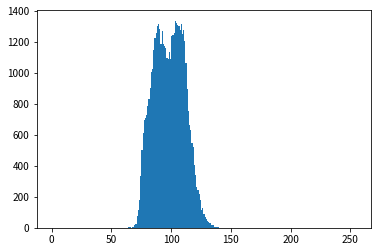

In [4]:
img = cv2.imread("./img/imori_dark.jpg")

plt.figure(facecolor="white")
plt.hist(img.ravel(),bins=255,range=(0, 255))
plt.show()

# ヒストグラム正規化

In [5]:
def hist_normalization(img,a,b):
    c = np.min(img)
    d = np.max(img)
    out = img.copy()
    out = (b-a) / (d - c) * (out - c) + a
    out[out < a] = a
    out[out > b] = b
    out = out.astype(np.uint8)
    
    return out

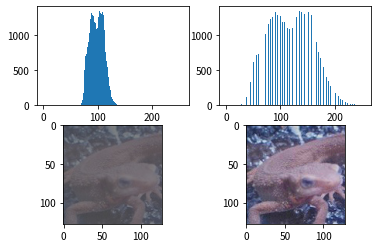

In [8]:
img = cv2.imread("./img/imori_dark.jpg")

out = hist_normalization(img,0,255)
plt.figure(facecolor="white")
plt.subplot(2,2,1)
plt.hist(img.ravel(),bins=255,range=(0, 255))
plt.subplot(2,2,2)
plt.hist(out.ravel(),bins=255,range=(0, 255))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# ヒストグラム操作

In [11]:
def hist_manipulation(img,md,sd):
    m = np.mean(img)
    s = np.std(img)
    
    out = np.copy(img)
    out = sd/s *(out-m)+md
    out[out<0] = 0
    out[out>255] = 255
    out = out.astype(np.uint8)
    return out

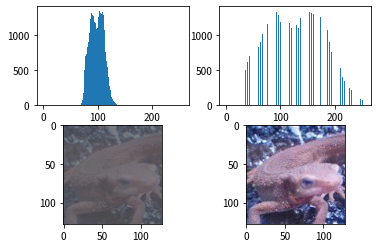

In [12]:
img = cv2.imread("./img/imori_dark.jpg")

out = hist_manipulation(img,128,52)
plt.figure(facecolor="white")
plt.subplot(2,2,1)
plt.hist(img.ravel(),bins=255,range=(0, 255))
plt.subplot(2,2,2)
plt.hist(out.ravel(),bins=255,range=(0, 255))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# ヒストグラム平坦化

In [14]:
def hist_equalization(img,z_max = 255):
    H, W, C = img.shape
    S = H * W * C * 1.

    out = img.copy()

    sum_h = 0.

    for i in range(1, 255):
        ind = np.where(img == i)
        sum_h += len(img[ind])
        z_prime = z_max / S * sum_h
        out[ind] = z_prime

    out = out.astype(np.uint8)

    return out    

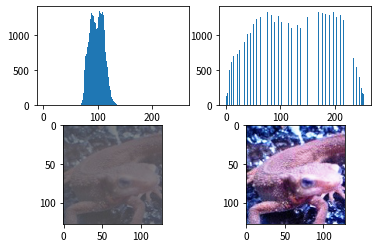

In [15]:
img = cv2.imread("./img/imori_dark.jpg")

out = hist_equalization(img)
plt.figure(facecolor="white")
plt.subplot(2,2,1)
plt.hist(img.ravel(),bins=255,range=(0, 255))
plt.subplot(2,2,2)
plt.hist(out.ravel(),bins=255,range=(0, 255))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()